# Summary of the data
This dataset contains the transaction history of 5942 unique customers from 2009 to 2011 from different countries.

Attribute Information:
1. InvoiceNo: Invoice number. Nominal. A 6-digit integral number is uniquely assigned to each transaction. If this    code starts with the letter 'c', it indicates a cancellation.
2. StockCode: Product (item) code. Nominal. A 5-digit integral number is uniquely assigned to each distinct            product.
3. Description: Product (item) name. Nominal.
4. Quantity: The quantities of each product (item) per transaction. Numeric.
5. InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.
6. Price: Unit price. Numeric. Product price per unit in sterling (Â£).
7. CustomerID: Customer number. Nominal. A 5-digit integral number is uniquely assigned to each customer.
8. Country: Country name. Nominal. The name of the country where a customer resides.

In [485]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Preparation Steps and Assumptions:

In [113]:
# Reading the Excel file and loading both sheets into single pandas DataFrames
excel_file = '/Users/abhishekdey/Downloads/datasets/Decathlon_Dataset/customer_transactions_sample.xlsx'
df1 = pd.read_excel(excel_file, sheet_name='Year 2010-2011')
df2 = pd.read_excel(excel_file, sheet_name='Year 2009-2010')


combined_df = pd.concat([df1, df2], axis=0)

Data Quality:


Data Quality Dimensions
    Completeness -> Is data missing?
    Validity -> Is data invalid? -> negative Price or Duplicate Invoice
    Accuracy -> Data is valid but not accurate -> Price is too high
    Consistency -> both valid and accurate but written differently -> United Kingdom and UK
    
Order of severity
    Completeness -> Validity -> Accuracy -> Consistency
    
There are 2 types of assesment done : 
    > Manual - Eyeing through the data manually in MS Excel.
    > Programmatic - By using pandas functions such as info(), describe() etc.

Observations:   
1. StockCode:- This column contains observations like D, DOT, M, Bank charges, gifts, Amazon fee, and  Sample where    the Customer ID column value is empty.
2. Description: - Contains some null values as well as some item names starts with "?", also they have some extra      spaces in item description.
3. Quantity:- This column contains some negative values.
4. InvoiceDate-  Both date and time are in the same column.
5. Price -  This column has some negative values.
6. This column contains some null values. 

In [226]:
#copy dataset
cust_df = combined_df.copy()

In [11]:
#You can choose to assess the data this way but i like to do it individually.
"""def assessment(dataframe):
    print('Head:')
    print(dataframe.head())
    print("******************************")
    print('\n')
    print('Tail:')
    print(dataframe.tail())
    print("******************************")
    print('\n')
    print('info:')
    print(dataframe.info())
    print("******************************")
    print('\n')
    print('Null Values:')
    print(dataframe.isna().sum())
    print("******************************")
    print('\n')
    print('describe:')
    print(dataframe.describe([0.01,0.05,0.25,0.5,0.75,0.99]).T)
    print("******************************")
    print('\n')
    print('Shape:')
    print(dataframe.shape)"""
    

In [12]:
assessment(cust_df)

Head:
  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  Price  Customer ID         Country  
0 2010-12-01 08:26:00   2.55      17850.0  United Kingdom  
1 2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
2 2010-12-01 08:26:00   2.75      17850.0  United Kingdom  
3 2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
4 2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
******************************


Tail:
       Invoice StockCode                         Description  Quantity  \
525456  538171     22271                FELTCRAFT DOLL ROSIE         2   
525457  538171     22750  

In [227]:
cust_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [228]:
cust_df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [118]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [229]:
#checking the number of unique items.
def unique_items(dataframe):
    columns = ['Invoice','StockCode','Description', 'Customer ID', 'Country']
    for column in columns:
        unique_values = dataframe[column].nunique()
        print(f"Unique values in {column}: {unique_values}")


In [230]:
unique_items(cust_df)

Unique values in Invoice: 53628
Unique values in StockCode: 5305
Unique values in Description: 5698
Unique values in Customer ID: 5942
Unique values in Country: 43


In [231]:
#start and end date
print("Start date: ", cust_df['InvoiceDate'].min())
print("End date: ",cust_df['InvoiceDate'].max())

Start date:  2009-12-01 07:45:00
End date:  2011-12-09 12:50:00


In [232]:
cust_df.describe([0.01,0.05,0.25,0.5,0.75,0.99]).T

,count,mean,min,1%,5%,25%,50%,75%,99%,max,std
Quantity,1067371.0,9.938898,-80995.0,-3.0,1.0,1.0,3.0,10.0,100.0,80995.0,172.705794
InvoiceDate,1067371,2011-01-02 21:13:55.394028800,2009-12-01 07:45:00,2009-12-04 12:36:00,2010-01-12 17:15:00,2010-07-09 09:46:00,2010-12-07 15:28:00,2011-07-22 10:23:00,2011-12-06 13:20:00,2011-12-09 12:50:00,NaN
Price,1067371.0,4.649388,-53594.36,0.21,0.42,1.25,2.1,4.15,18.0,38970.0,123.553059
Customer ID,824364.0,15324.638504,12346.0,12422.0,12681.0,13975.0,15255.0,16797.0,18207.0,18287.0,1697.46445


In [233]:
cust_df.shape

(1067371, 8)

In [234]:
#As we know that the cancelled items in StockCode startes with C so lets seperate and store it. 

cust_df[cust_df["Invoice"].str.contains("C", na=False)].shape[0]

19494

In [235]:
#there are 19494 items which are cancelled out of 1067371
df_cancelled = cust_df[cust_df["Invoice"].str.contains("C", na=False)]
print('Cancel order percentage :',((df_cancelled.shape[0]/cust_df.shape[0]))*100,'%' )

Cancel order percentage : 1.8263565339511754 %


In [236]:
#lets remove the cancelled data from the dataframe cust_df
cust_df = cust_df[~cust_df["Invoice"].str.contains("C", na=False)]

In [237]:
cust_df.shape

(1047877, 8)

In [238]:
cust_df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    242257
Country             0
dtype: int64

Text(0.5, 1.0, 'Visualising Missing Values')

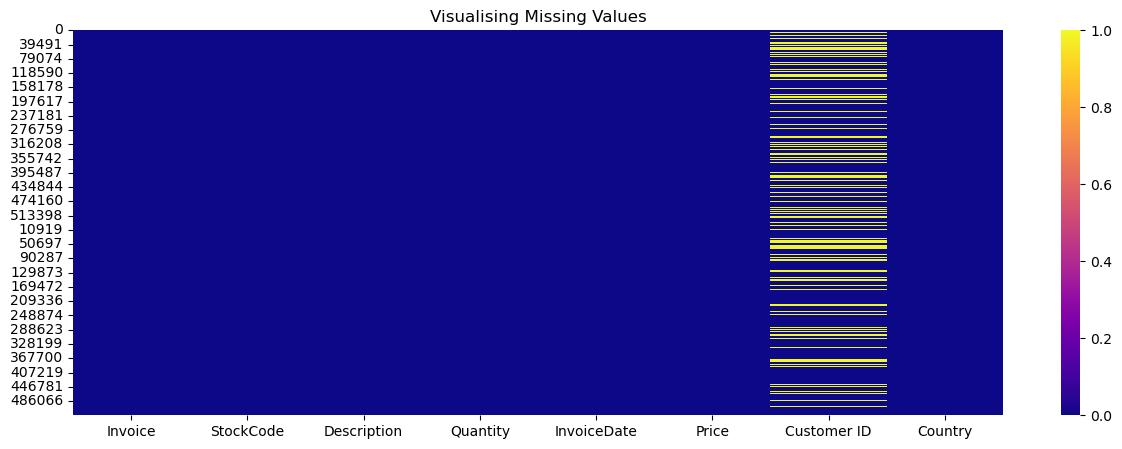

In [239]:
plt.figure(figsize =(15,5))
sns.heatmap(cust_df.isnull(), cmap ='plasma')
plt.title('Visualising Missing Values')

In [240]:
#Null percentage
print('Missing Value percentage in Description column:',((cust_df['Description'].isna().sum()/cust_df.shape[0]))*100,'%')
print('Missing Value percentage in Customer ID column:',((cust_df['Customer ID'].isna().sum()/cust_df.shape[0]))*100,'%')

Missing Value percentage in Description column: 0.41817885114378883 %
Missing Value percentage in Customer ID column: 23.118839329425114 %


In [241]:
#As we can see the the % of missing records are small so we can drop those records
cust_df.dropna(inplace = True)

In [242]:
cust_df.shape

(805620, 8)

In [243]:
#As we can see there are no negative values in Quantity and Price.
cust_df.describe([0.01,0.05,0.25,0.5,0.75,0.99]).T

,count,mean,min,1%,5%,25%,50%,75%,99%,max,std
Quantity,805620.0,13.307665,1.0,1.0,1.0,2.0,5.0,12.0,128.0,80995.0,144.306739
InvoiceDate,805620,2011-01-02 10:26:35.704327168,2009-12-01 07:45:00,2009-12-04 14:14:00,2010-01-18 13:34:00,2010-07-07 12:08:00,2010-12-03 15:10:00,2011-07-28 13:28:00,2011-12-05 17:17:00,2011-12-09 12:50:00,NaN
Price,805620.0,3.206279,0.0,0.29,0.42,1.25,1.95,3.75,14.95,10953.5,29.197901
Customer ID,805620.0,15331.85625,12346.0,12422.0,12681.0,13982.0,15271.0,16805.0,18204.0,18287.0,1696.768395


Here we can see the min value for quantity and Price is 1 and 0 respectively.
Previously we had negative values for these columns 

In [258]:
#Checking how many products have their price as zero
cust_df[cust_df['Price']==0].shape[0]

71

In [256]:
#as we can see there are 71 items with price as zero, so it makes no sense to keep them in the dataset
cust_df[cust_df['Price']==0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,month,Year
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0,Dec,2010
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,Dec,2010
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,Dec,2010
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,Jan,2011
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,Jan,2011


In [259]:
#lets remove the items where the price is 0
cust_df = cust_df[cust_df['Price']>0]
cust_df.shape

(805549, 11)

In [260]:
#Lets create a new column TotalPrice
cust_df['TotalPrice'] = cust_df["Quantity"]*cust_df["Price"]

In [261]:
cust_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Dec,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Dec,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Dec,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Dec,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Dec,2010


In [262]:
cust_df.sort_values(by='TotalPrice', ascending=False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,month,Year
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6,Dec,2011
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6,Jan,2011
222671,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0,Jun,2011
432176,530715,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,9360,2010-11-04 11:36:00,1.69,15838,United Kingdom,15818.4,Nov,2010
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918,United Kingdom,10953.5,Mar,2010


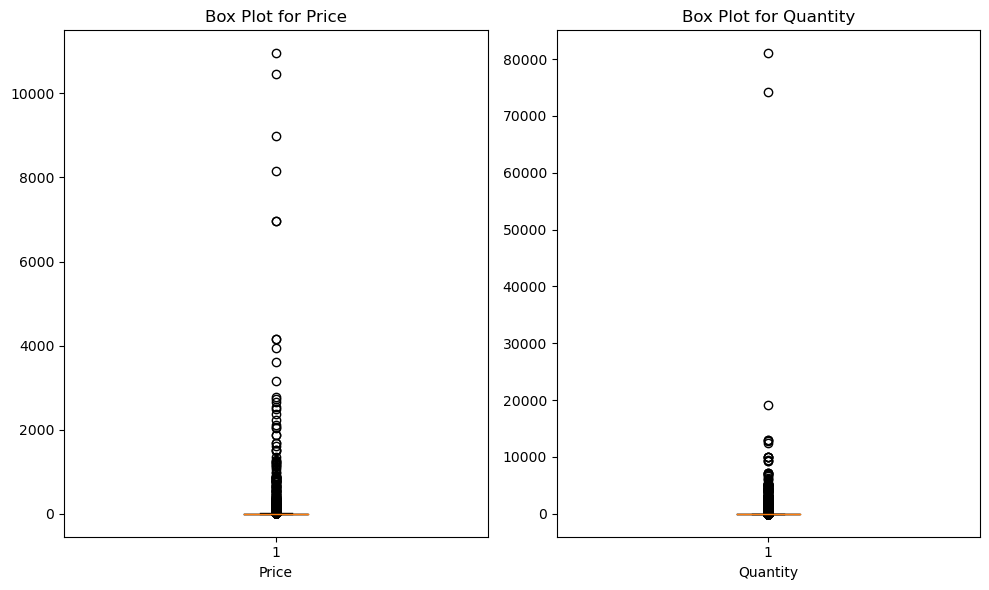

In [453]:
plt.figure(figsize=(10, 6))

# Box plot for Price
plt.subplot(1, 2, 1)
plt.boxplot(cust_df['Price'])
plt.title('Box Plot for Price')
plt.xlabel('Price')


# Box plot for Quantity
plt.subplot(1, 2, 2)
plt.boxplot(cust_df['Quantity'])
plt.title('Box Plot for Quantity')
plt.xlabel('Quantity')

plt.tight_layout()
plt.show()

As we can see there are many outliers in price and Quantity column,  We are deciding not to remove those outliers because when doing RFM analysis, outliers may be indicative of important customer segments, such as high-value customers, which should not be excluded from the analysis.

In [263]:
#As InvoiceDate has both date and time in same column lets seperate and make a seperate column for month and year
cust_df['month'] = cust_df['InvoiceDate'].dt.strftime('%b')
cust_df['Year'] = cust_df['InvoiceDate'].dt.year

In [264]:
cust_df['Customer ID'] = cust_df['Customer ID'].apply(int)

In [265]:
cust_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Dec,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Dec,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Dec,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Dec,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Dec,2010


# Key Actionable Insights and Data Visualizations



In [250]:
#Number of unique Invoices 
print('Number of unique Invoices:', cust_df['Invoice'].nunique())

Number of unique Invoices: 36975


In [251]:
#Number of unique Products 
print('Number of unique Products:', cust_df['Description'].nunique())

Number of unique Products: 5283


In [434]:
#total sales over the period of 2 years without concedering the returned products
print('Total Sales:',' Â£', cust_df['TotalPrice'].sum())

Total Sales:  Â£ 17743429.178


In [615]:
#total number of product sold over the period of 2 years without concedering the returned products
print('Total product sold:', cust_df['Quantity'].sum(),'units')


Total product sold: 10706167 units


In [294]:
# Countries with higest item quantity Sold
Top_10_countries = cust_df.groupby('Country')['Quantity'].sum().nlargest(10)
Top_10_countries

Country
United Kingdom    8705313
Netherlands        383977
EIRE               321703
France             273674
Denmark            237925
Germany            227983
Australia          104090
Sweden              88512
Switzerland         52337
Spain               50796
Name: Quantity, dtype: int64

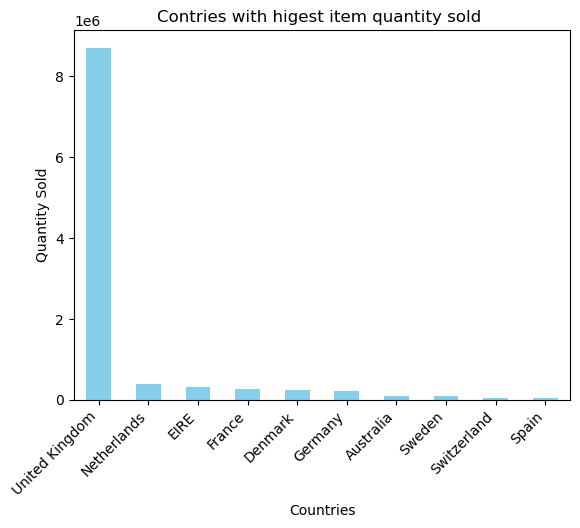

In [295]:
Top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Contries with higest item quantity sold ')
plt.xlabel('Countries')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()


In [621]:
# Countries with higest item quantity Sold
Top_10_countries_sales = cust_df.groupby('Country')['TotalPrice'].sum().nlargest(10)
Top_10_countries_sales

Country
United Kingdom    1.472315e+07
EIRE              6.216311e+05
Netherlands       5.542323e+05
Germany           4.312625e+05
France            3.552575e+05
Australia         1.699681e+05
Spain             1.091785e+05
Switzerland       1.003653e+05
Sweden            9.154972e+04
Denmark           6.986219e+04
Name: TotalPrice, dtype: float64

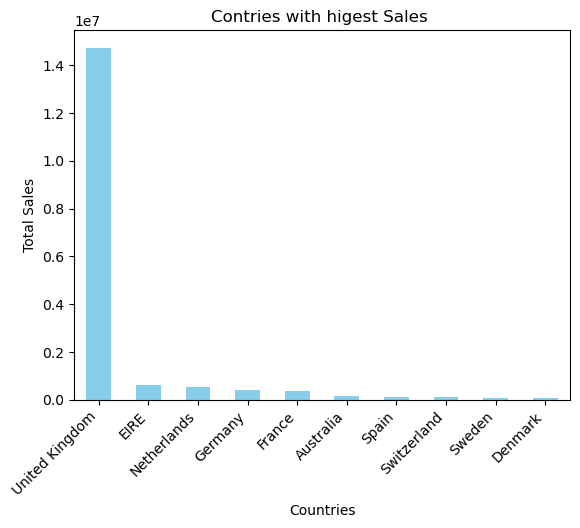

In [622]:
Top_10_countries_sales.plot(kind='bar', color='skyblue')
plt.title('Contries with higest Sales ')
plt.xlabel('Countries')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

In [367]:
#what are the most retruned product (Note: Not considering ite,- Manual)
filtered_df = df_cancelled[~df_cancelled['Description'].str.contains("Manual")]
top_10_cancelled_items = filtered_df['Description'].value_counts().head(10)
top_10_cancelled_items

Description
REGENCY CAKESTAND 3 TIER              347
POSTAGE                               229
BAKING SET 9 PIECE RETROSPOT          211
STRAWBERRY CERAMIC TRINKET BOX        184
Discount                              172
WHITE HANGING HEART T-LIGHT HOLDER    135
WHITE CHERRY LIGHTS                   121
RED RETROSPOT CAKE STAND              111
SAMPLES                               101
JAM MAKING SET WITH JARS               90
Name: count, dtype: int64

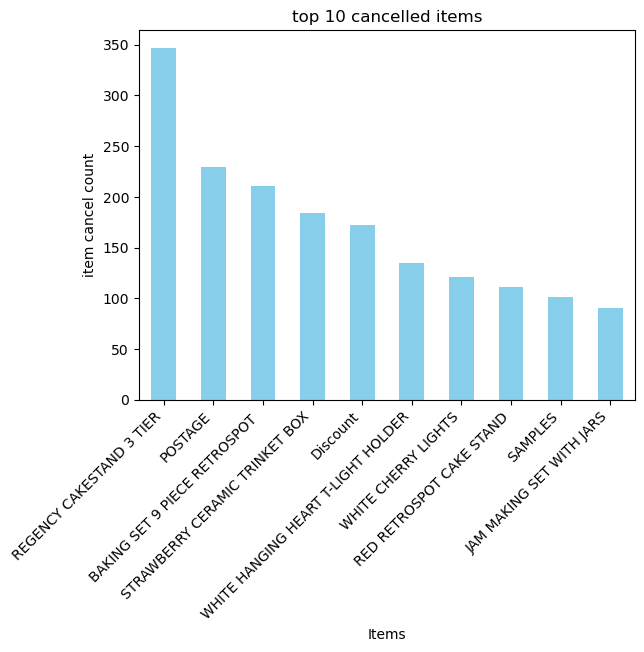

In [368]:
top_10_cancelled_items.plot(kind='bar', color='skyblue')
plt.title('top 10 cancelled items')
plt.xlabel('Items')
plt.ylabel('item cancel count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [391]:
#what are the most returned product in each country
returned_product_country_wise = filtered_df.groupby(['Country', 'Description']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
idx = returned_product_country_wise.groupby('Country')['Count'].idxmax()
Top_5_most_returned_in_each_country = returned_product_country_wise.loc[idx].sort_values(by='Count',ascending = False).head(5)
Top_5_most_returned_in_each_country

,Country,Description,Count
3901,United Kingdom,REGENCY CAKESTAND 3 TIER,287
1201,Germany,REGENCY CAKESTAND 3 TIER,35
800,France,POSTAGE,17
532,EIRE,REGENCY CAKESTAND 3 TIER,10
1672,Sweden,POSTAGE,6


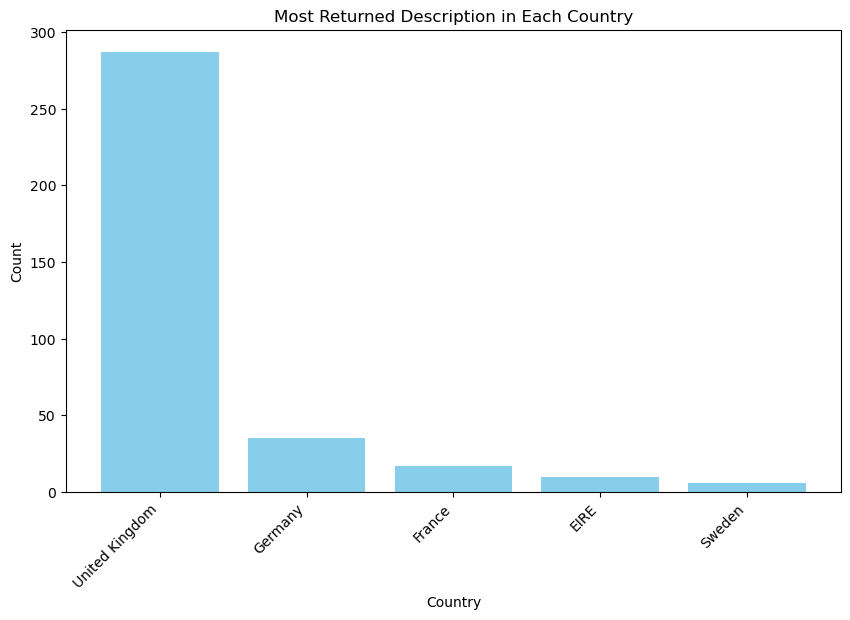

In [395]:
plt.figure(figsize=(10, 6))
plt.bar(Top_10_most_returned_in_each_country['Country'], Top_10_most_returned_in_each_country['Count'], color='skyblue')

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Most Returned Description in Each Country')
plt.xticks(rotation=45, ha='right')

plt.show()


In [288]:
#top 10 products in terms of stockcode
top_10_stockcode=cust_df['StockCode'].value_counts().head(10)
top_10_stockcode

StockCode
85123A    5188
22423     3428
85099B    3360
84879     2777
20725     2678
21212     2654
21034     2141
47566     2121
20727     2117
22383     2100
Name: count, dtype: int64

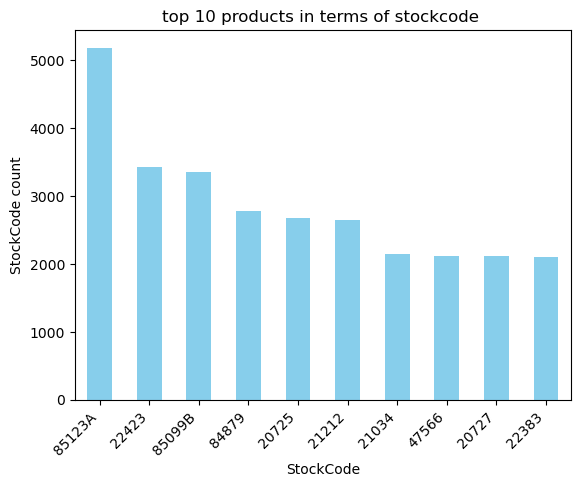

In [291]:
top_10_stockcode.plot(kind='bar', color='skyblue')
plt.title('top 10 products in terms of stockcode ')
plt.xlabel('StockCode')
plt.ylabel('StockCode count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [286]:
#Top 10 frequest Customers
top_10_cust = cust_df['Customer ID'].value_counts().head(10)
top_10_cust

Customer ID
17841    12890
14911    11245
12748     7228
14606     6566
14096     5111
15311     4434
14156     4048
14646     3849
13089     3362
16549     3250
Name: count, dtype: int64

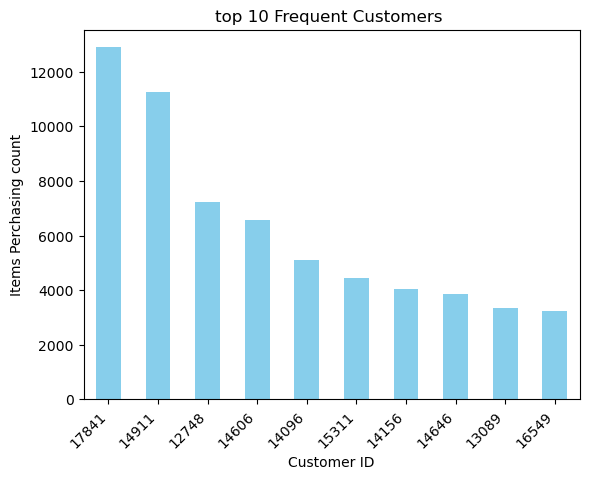

In [290]:
top_10_cust.plot(kind='bar', color='skyblue')
plt.title('top 10 Frequent Customers ')
plt.xlabel('Customer ID')
plt.ylabel('Items Perchasing count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [271]:
#Most bought item
top_10_units_sold = cust_df.groupby('Description')['Quantity'].sum().nlargest(10)
top_10_units_sold_df = top_10_units_sold.reset_index().rename(columns={'Description':'Product_name', 0:'Quantity Sold'})
top_10_units_sold_df

,Product_name,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,109169
1,WHITE HANGING HEART T-LIGHT HOLDER,93640
2,"PAPER CRAFT , LITTLE BIRDIE",80995
3,ASSORTED COLOUR BIRD ORNAMENT,79913
4,MEDIUM CERAMIC TOP STORAGE JAR,77916
5,JUMBO BAG RED RETROSPOT,75759
6,BROCADE RING PURSE,71129
7,PACK OF 60 PINK PAISLEY CAKE CASES,55270
8,60 TEATIME FAIRY CAKE CASES,53495
9,PACK OF 72 RETROSPOT CAKE CASES,46107


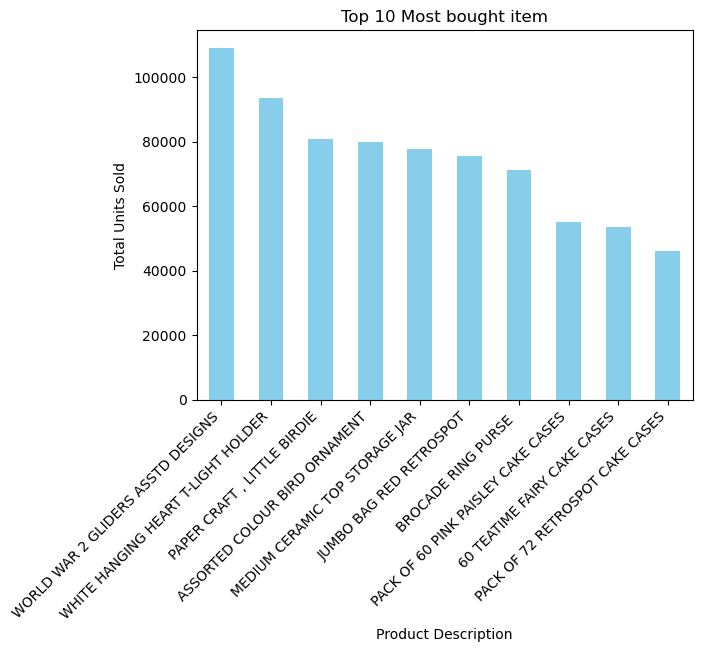

In [172]:
top_10_units_sold.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most bought item')
plt.xlabel('Product Description')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

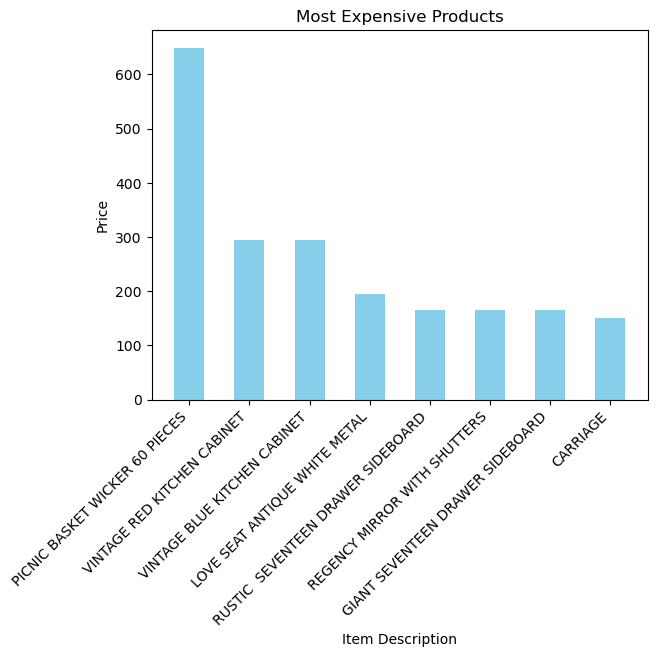

In [396]:
#Which are the most expensive products?(Note:- Not including -POSTAGE, Manual,DOTCOM POSTAGE and ..)

filtered_df = cust_df[~cust_df["Description"].isin(["POSTAGE", "Manual", "DOTCOM POSTAGE",'Adjustment by john on 26/01/2010 17','Adjustment by Peter on Jun 25 2010','Adjustment by john on 26/01/2010 16','Adjustment by Peter on Jun 25 2010 '])]

sorted_df = filtered_df.sort_values("Price", ascending=False)

top_expensive_products = sorted_df.head(100)

plt.bar(top_expensive_products["Description"], top_expensive_products["Price"], color='skyblue', width=0.5)
plt.xlabel('Item Description')
plt.ylabel('Price')
plt.title('Most Expensive Products')
plt.xticks(rotation=45, ha='right')
plt.show()

In [619]:
#sales behavious over different month
cust_df['month_year'] = cust_df['InvoiceDate'].dt.to_period('M')
sales_count_by_month_year = cust_df.groupby('month_year').size()
sales_count_by_month_year.sort_values(ascending = False)

month_year
2011-11    64531
2010-11    60312
2010-10    49561
2011-10    49554
2010-12    40661
2011-09    40028
2010-09    34599
2010-03    32301
2010-06    31188
2009-12    30754
2010-05    28644
2011-05    28320
2010-04    27235
2011-06    27185
2011-03    27175
2010-07    27032
2011-08    27007
2011-07    26825
2010-08    26392
2010-02    23367
2011-04    22642
2010-01    21775
2011-01    21229
2011-02    19927
2011-12    17305
Freq: M, dtype: int64

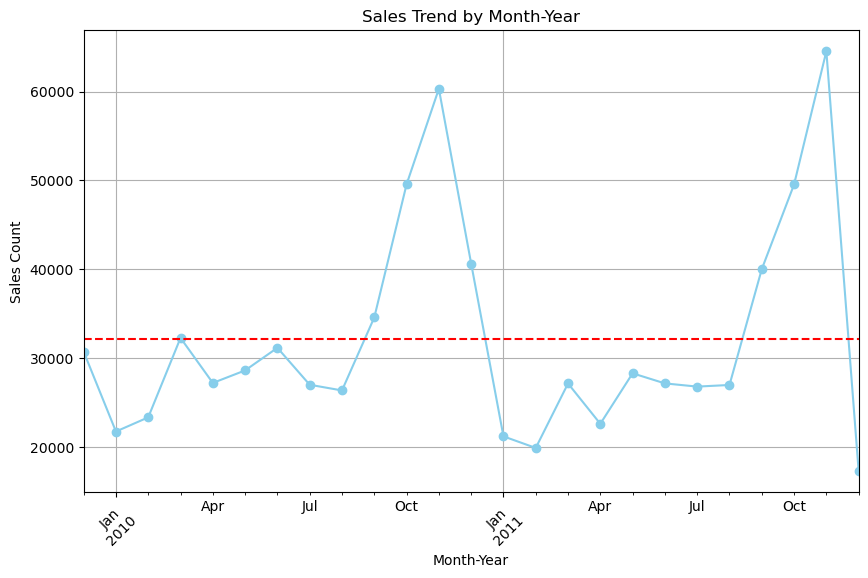

In [623]:
average_sales_per_month = sales_count_by_month_year.mean()

plt.figure(figsize=(10, 6))
sales_count_by_month_year.plot(kind='line', marker='o', color='skyblue')
plt.axhline(y=average_sales_per_month, color='red', linestyle='--', label=average_sales_per_month)
plt.title('Sales Trend by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

month
Apr     49877
Aug     53399
Dec     88720
Feb     43294
Jan     43004
Jul     53857
Jun     58373
Mar     59476
May     56964
Nov    124843
Oct     99115
Sep     74627
Name: count, dtype: int64


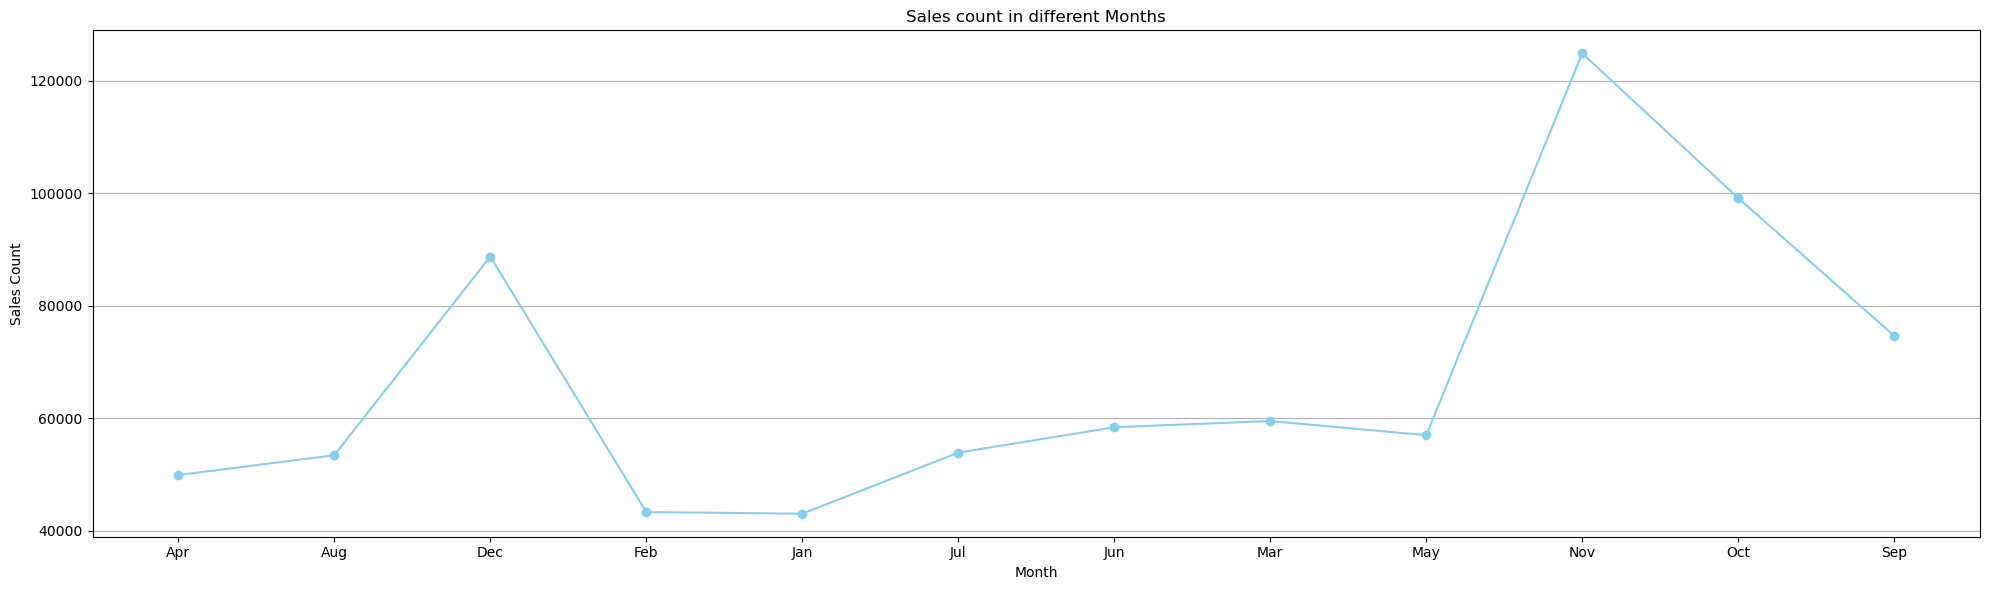

In [449]:
# Sales count in different months.
sales_count_by_month = cust_df['month'].value_counts().sort_index()

print(sales_count_by_month)
plt.figure(figsize=(20, 6))
plt.plot(sales_count_by_month.index, sales_count_by_month.values, color='skyblue', marker='o')
plt.title('Sales count in different Months')
plt.xlabel('Month')
plt.ylabel('Sales Count')


plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [438]:
# Sales count in different days.
cust_df['day'] = cust_df['InvoiceDate'].dt.day_name()
sales_count_by_day = cust_df['day'].value_counts()
sales_count_by_day

day
Thursday     161664
Tuesday      136794
Wednesday    136501
Sunday       136329
Monday       128359
Friday       105502
Saturday        400
Name: count, dtype: int64

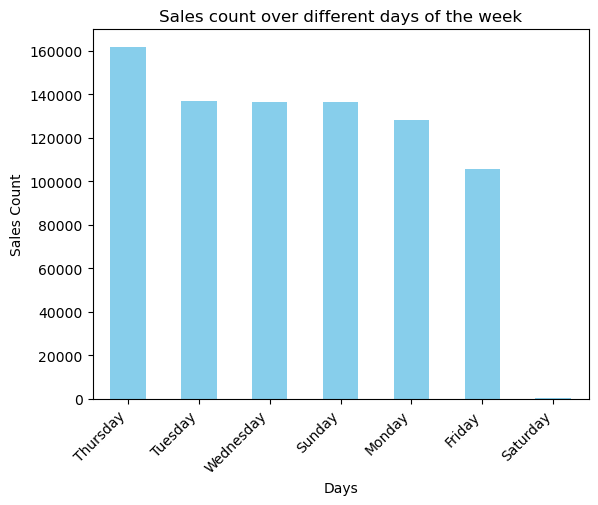

In [443]:

sales_count_by_day.plot(kind='bar', color='skyblue')
plt.title('Sales count over different days of the week')
plt.xlabel('Days')
plt.ylabel('Sales Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#Outlier detection and removal using IQR
Q1 = cust_df['Price'].quantile(0.01)
Q3 = cust_df['Price'].quantile(0.99)
IQR = Q3-Q1
U_limit = Q3 + 1.5*IQR
L_limit = Q1 - 1.5*IQR
U_limit, L_limit

# Model Building

RFM Model Analysis: What is RFM?
RFM (Recency, Frequency, and Monetary) analysis is a popular consumer segmentation technique in marketing and analytics. It assists organizations in understanding and classifying their clients based on three important factors:

How recently they made a purchase (Recency),
How frequently they make purchases (Frequency),
How much they spend (Monetary value).

RFM analysis enables organizations to discover and target specific client categories through customized marketing strategies.

Why is it needed?
RFM Analysis is a marketing framework for understanding and analyzing client behavior based on the three aspects mentioned above: recency, frequency, and monetary.

The RFM Analysis will assist organizations in segmenting their consumer base into multiple homogenous groups, allowing them to engage with each group with different targeted


In [526]:
rfm_data = cust_df.copy()

In [527]:
rfm_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,month,Year,month_year,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Dec,2010,2010-12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Dec,2010,2010-12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Dec,2010,2010-12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Dec,2010,2010-12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Dec,2010,2010-12,Wednesday


In [543]:
rfm_data['Customer ID'].nunique()

5878

In [544]:



# we are concedering the current date as 1st Jan 2012.

# Calculate RFM metrics
current_date = pd.to_datetime('2012-01-01')
rfm_df = rfm_data.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                 # Frequency
    'TotalPrice': 'sum'                                     # Monetary
}).reset_index()

rfm_df.head(5)

,Customer ID,InvoiceDate,Invoice,TotalPrice
0,12346,347,12,77556.46
1,12347,24,8,5633.32
2,12348,97,5,2019.40
3,12349,40,4,4428.69
4,12350,332,1,334.40


In [545]:
rfm_df.columns = ["Customer_ID",'Recency', 'Frequency', 'Monetary']
rfm_df.sort_values(by=['Monetary'], ascending=False).head()


,Customer_ID,Recency,Frequency,Monetary
5692,18102,22,145,608821.65
2277,14646,23,151,528602.52
1789,14156,31,156,313946.37
2538,14911,23,398,295972.63
5050,17450,30,51,246973.09


In [546]:
rfm_df.shape

(5878, 4)

In [547]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer_ID  5878 non-null   int64  
 1   Recency      5878 non-null   int64  
 2   Frequency    5878 non-null   int64  
 3   Monetary     5878 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 183.8 KB


In [548]:
rfm_df.index = rfm_df['Customer_ID']
rfm_df.drop('Customer_ID', axis = 1, inplace = True)
rfm_df.describe([0.01,0.05,0.25,0.5,0.75,0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,99%,max
Recency,5878.0,222.866791,209.353961,22.00,23.0000,25.0000,47.0000,117.000,401.00,748.0000,760.00
Frequency,5878.0,6.289384,13.009406,1.00,1.0000,1.0000,1.0000,3.000,7.00,46.0000,398.00
Monetary,5878.0,3018.616737,14737.731040,2.95,46.8465,114.1085,348.7625,898.915,2307.09,29730.4202,608821.65


As we can see there are dfferent scale for Recency,Frequency and Monerary, for Example Monetary max value is 608821.65 wheras frequency max value is just 398.
To have an efficient model we need to scale the columns

In [549]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(rfm_df)

# We will be using 2 types of clustering for this
1. Quantile-Based Clustering
2. K-means Clustering

qcut Clustering (Quantile-Based Clustering):

Purpose: Divides a continuous variable (like RFM scores) into a specific number of groups (bins) based on quantiles (equal-sized portions of the data distribution).
Method: Uses the pd.qcut function in pandas to create bins. For each RFM score (Recency, Frequency, Monetary), it creates bins with roughly the same number of customers.
Output: Categorical labels for each customer, indicating which bin (cluster) they belong to based on their RFM scores.
Clustering Approach: Creates a fixed, non-overlapping clustering based on quantiles. Customers with similar RFM scores within a bin are considered similar.
K-means Clustering:


Purpose: Groups data points into a predefined number of clusters (k) based on their similarity (distance) in a multidimensional space.
Method: Iteratively assigns data points to the nearest cluster centroid (mean) and recomputes the centroids until a convergence criterion is met.
Output: Cluster labels for each customer, indicating which of the k clusters they belong to.
Clustering Approach: Creates data-driven, potentially overlapping clusters. Customers with similar RFM scores (considering all three dimensions together) are grouped.

In [550]:
rfm_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5878 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    5878 non-null   int64  
 1   Frequency  5878 non-null   int64  
 2   Monetary   5878 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 183.7 KB


In [551]:
#Quartile based Clustering
rfm_df["RecencyScore"] = pd.qcut(rfm_df['Recency'], 5, labels = [5, 4, 3, 2, 1])
rfm_df["MonetaryScore"] = pd.qcut(rfm_df['Monetary'], 5, labels=[5, 4, 3, 2, 1])

labels = [1, 2, 3, 4, 5]
intervals = [0, 1, 2, 4, 8, float('inf')]
rfm_df["FrequencyScore"] = pd.cut(rfm_df['Frequency'], bins=intervals, labels=labels)


In [560]:
rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,MonetaryScore,FrequencyScore,RFM_SCORE
Customer_ID,,,,,,,
12346,347,12,77556.46,2,1,5,251
12347,24,8,5633.32,5,1,4,541
12348,97,5,2019.40,3,2,4,342
12349,40,4,4428.69,5,1,3,531
12350,332,1,334.40,2,4,1,214


In [561]:
rfm_df["RFM_Segment"] = rfm_df["RecencyScore"].astype(str) + rfm_df["FrequencyScore"].astype(str) + rfm_df["MonetaryScore"].astype(str)


In [573]:
rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,MonetaryScore,FrequencyScore,RFM_Segment
Customer_ID,,,,,,,
12346,347,12,77556.46,2,1,5,251
12347,24,8,5633.32,5,1,4,541
12348,97,5,2019.40,3,2,4,342
12349,40,4,4428.69,5,1,3,531
12350,332,1,334.40,2,4,1,214


In [574]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}


We will use Recency and Frequency scores to segment our customers. We assume that a consumer who has recently purchased and frequently purchases will have high RFM scores.

In [577]:
rfm_df['Segment'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str)
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True)
rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,MonetaryScore,FrequencyScore,RFM_Segment,Segment
Customer_ID,,,,,,,,
12346,347,12,77556.46,2,1,5,251,Can't Loose
12347,24,8,5633.32,5,1,4,541,Champions
12348,97,5,2019.40,3,2,4,342,Loyal Customers
12349,40,4,4428.69,5,1,3,531,Potential Loyalists
12350,332,1,334.40,2,4,1,214,Hibernating


In [579]:
rfm_df['Segment'].value_counts()

Segment
Hibernating            1639
Loyal Customers        1053
Champions               826
Potential Loyalists     711
At Risk                 640
About to Sleep          424
Need Attention          284
Promising               160
New Customers            77
Can't Loose              64
Name: count, dtype: int64

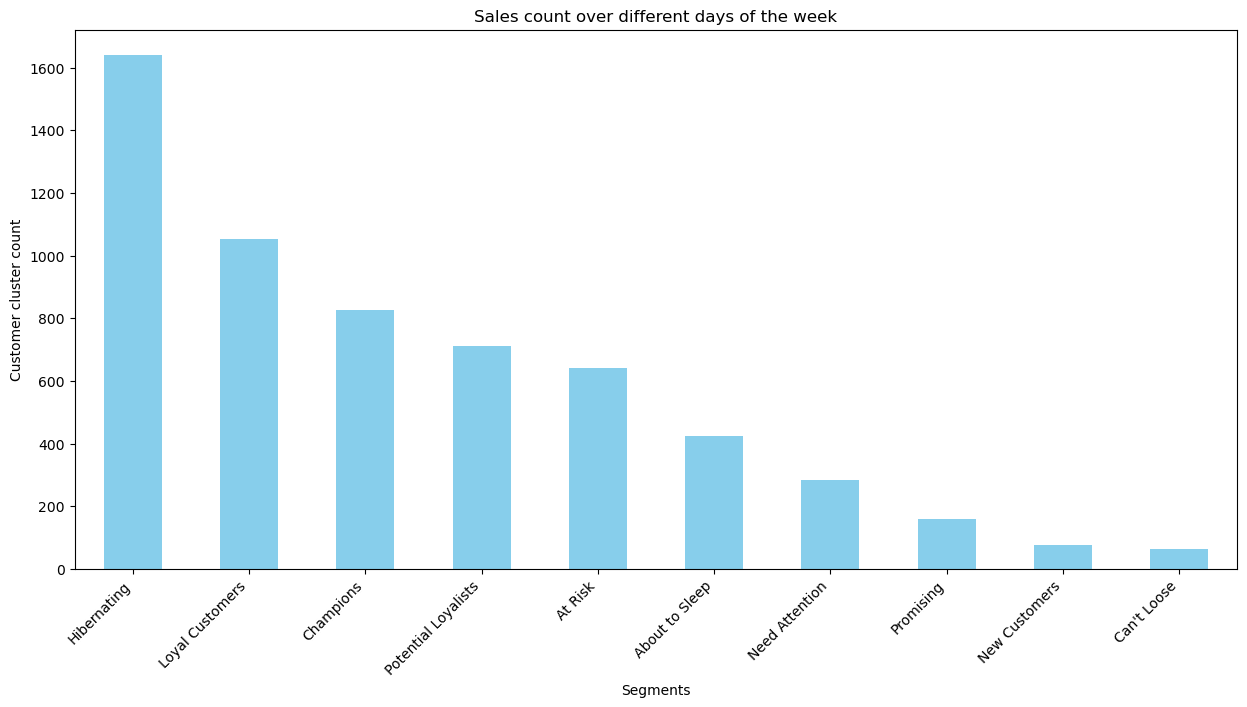

In [589]:
plt.figure(figsize=(15,7))
Seg = rfm_df['Segment'].value_counts()

Seg.plot(kind='bar', color='skyblue')
plt.title('Sales count over different days of the week')
plt.xlabel('Segments')
plt.ylabel('Customer cluster count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [580]:
rfm_df[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency        Frequency            Monetary      
                           mean count       mean count          mean count
Segment                                                                   
About to Sleep       130.011792   424   1.415094   424    536.860007   424
At Risk              386.626562   640   4.296875   640   1538.971797   640
Can't Loose          351.843750    64  16.796875    64   8984.661594    64
Champions             30.165860   826  19.693705   826  11102.327391   826
Hibernating          477.973154  1639   1.305674  1639    450.012143  1639
Loyal Customers       88.403609  1053  10.320988  1053   4467.940821  1053
Need Attention       133.788732   284   3.454225   284   1351.979859   284
New Customers         32.909091    77   1.000000    77    346.411818    77
Potential Loyalists   46.876231   711   2.884669   711   1234.952941   711
Promising             60.400000   160   1.000000   160    339.491875   160

The "Can't Loose Them" class represents the most hazardous and potentially focused clients on this table. This is the most valued customer category in this table. The recency value is low, yet it is the greatest when considering frequency. In other words, this consumer is the most likely to leave us. Among all consumer groups, monetary is one of the most valuable, although this group of customers has not recently swapped. He discussed leaving our company. This is the most crucial customer segment for our business.

The "AT Risk" customer segment should not be overlooked. This category also ranks among the highest in Frequency. It also draws attention because the third-class client group has the most customers. The recency value of this group is poor. This indicates that this group hasn't been shopping recently. It is vital to re-engage these clients with the company.

Customers in the "Need Attention" class exhibit average frequency and recency values. This client group is likewise a class that requires attention because it has the potential to shift between areas. As an action recommendation, if supported by promotions, discounts, and business loyalty, this customer category can be converted into loyal or potential loyal customers. However, as a result of such actions, they may be moved to the "horse risk" group or placed in the "about to sleep" category.

These groups' loyalty should be increased by promotions, discounts, and specific team initiatives. Special events should be organized for these customer groups.

# K-Means 

We are using the Elbow method to determin n_clusters, according to the chart below, the rate of decrease of the sum of squared distances starts to level off at point 3 and point 4.
We will be taking n_clusers as 4


/Users/abhishekdey/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/abhishekdey/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/abhishekdey/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/abhishekdey/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

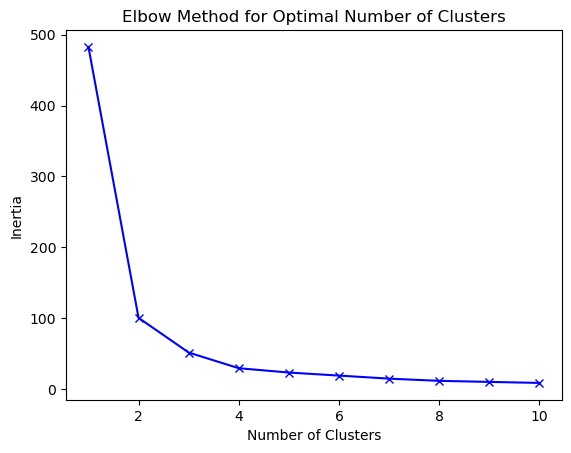

In [605]:
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(1, 11), inertia, "bx-")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()



/Users/abhishekdey/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
    R_score   F_score   M_score
0  0.558450  0.004334  0.001685
1  0.050704  0.020937  0.007732
2  0.287973  0.006869  0.002316
3  0.842342  0.001388  0.001012


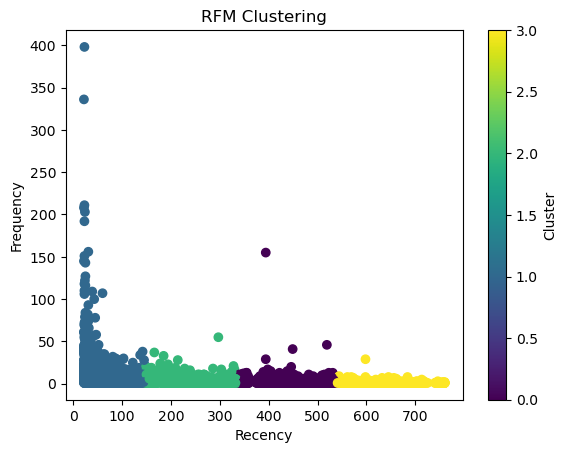

Cluster Summary:
            Recency  Frequency     Monetary
Cluster                                    
0        434.136036   2.720721  1028.967091
1         59.391539   9.310433  4709.767538
2        234.436677   3.737589  1417.731738
3        643.648352   1.551020   619.254854


In [608]:
# Apply K-means clustering 
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(X)
rfm_df["clusters"] = kmeans.labels_
print("Cluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=['R_score', 'F_score', 'M_score']))

# Visualize clusters
plt.scatter(rfm_df['Recency'], rfm_df['Frequency'], c=rfm_df['Cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Analyze cluster characteristics
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})
print("Cluster Summary:")
print(cluster_summary)

Cluster 0: Customers in this cluster have a relatively high recency value (434.14 days), indicating that they made their last purchase quite some time ago. They also have a low frequency (2.72) and monetary value ($1028.97). This suggests that these customers are not very active and may not contribute significantly to the overall revenue.

Cluster 1: This cluster represents customers with a low recency value (59.39 days), indicating that they have made a purchase recently. They also have a high frequency (9.31) and monetary value ($4709.77), suggesting that they are frequent and high-spending customers. This cluster likely contains the most valuable and engaged customers.

Cluster 2: Customers in this cluster have a moderate recency value (234.44 days) and a moderate frequency (3.74) and monetary value ($1417.73). They are somewhat active but not as much as those in Cluster 1. These customers may represent a segment that requires targeted marketing efforts to increase their engagement and spending.

Cluster 3: This cluster comprises customers with the highest recency value (643.65 days), indicating that they have not made a purchase for a long time. They also have the lowest frequency (1.55) and monetary value ($619.25). These customers are the least engaged and may require reactivation campaigns to encourage them to make purchases again.

In summary, Cluster 1 represents the most valuable customers who are frequent buyers and contribute significantly to revenue. Clusters 0, 2, and 3 represent segments with varying levels of engagement and value, requiring different marketing strategies to optimize their contributions to the business.

Comparing RFM metrics with K-Means

In [614]:
rfm_df.groupby(['Cluster', 'Segment'])[['Recency', 'Frequency', 'Monetary']].agg(["mean", "count"])


Recency        Frequency            Monetary  \
                                   mean count       mean count          mean   
Cluster Segment                                                                
0       At Risk              425.338279   337   4.204748   337   1350.686558   
        Can't Loose          425.516129    31  19.193548    31  11095.755194   
        Hibernating          438.491914   742   1.358491   742    462.269124   
1       About to Sleep       104.287770   278   1.388489   278    554.355507   
        Champions             30.165860   826  19.693705   826  11102.327391   
        Loyal Customers       75.156863   918  10.594771   918   4693.128968   
        Need Attention       105.155172   174   3.477011   174   1238.732989   
        New Customers         32.909091    77   1.000000    77    346.411818   
        Potential Loyalists   46.876231   711   2.884669   711   1234.952941   
        Promising             60.400000   160   1.000000   160    339.491875   
2       About to Sleep       178.993151   146   1.465753   146    503.546658   
        At Risk              267.694915   236   4.474576   236   1681.537161   
        Can't Loose          264.032258    31  14.258065    31   6668.716484   
        Hibernating          273.863222   329   1.395137   329    478.232219   
        Loyal Customers      178.481481   135   8.459259   135   2936.661422   
        Need Attention       179.081818   110   3.418182   110   1531.115818   
3       At Risk              610.835821    67   4.134328    67   1983.847910   
        Can't Loose          571.000000     2  19.000000     2  12159.860000   
        Hibernating          647.774648   568   1.184859   568    417.654599   

                                   
                            count  
Cluster Segment                    
0       At Risk               337  
        Can't Loose            31  
        Hibernating           742  
1       About to Sleep        278  
        Champions             826  
        Loyal Customers       918  
        Need Attention        174  
        New Customers          77  
        Potential Loyalists   711  
        Promising             160  
2       About to Sleep        146  
        At Risk               236  
        Can't Loose            31  
        Hibernating           329  
        Loyal Customers       135  
        Need Attention        110  
3       At Risk                67  
        Can't Loose             2  
        Hibernating           568

Cluster 0:

- At Risk: Customers in this segment made their last purchase a while ago (425.34 days), but they still have a moderate frequency (4.20) and monetary value (1350.69).
- Can't Lose: These customers have not made recent purchases, but they have a high frequency (19.19) and monetary value (11095.76). They are valuable customers who have spent a substantial amount in the past.

Cluster 1:

- About to Sleep: Customers in this segment have made a recent purchase (104.29 days), but they exhibit a low frequency (1.39) and monetary value (554.36). They may be at risk of becoming less engaged.
- Champions: These are the most engaged and valuable customers with the lowest recency value (30.17 days), highest frequency (19.69), and monetary value ($11102.33). They are the most loyal and contribute significantly to revenue.
- Loyal Customers: Similar to Champions but with slightly higher recency (75.16 days) and lower frequency (10.59) and monetary value (4693.13).

Cluster 2:

- About to Sleep: Customers in this segment have made a recent purchase (178.99 days), but they exhibit a slightly higher frequency and monetary value.
- At Risk: Customers in this segment have not made a recent purchase (267.69 days), but they still have a moderate frequency(4.47) and monetary value (1681.54).They are at risk of becoming disengaged.
- Can't Lose: These customers have not made recent purchases, but they have a slightly lower frequency and monetary value than the Can't Lose segment in Cluster 0.
- Hibernating: These customers have not made a purchase for a long time (647.77 days), and they have the lowest frequency (1.18) and monetary value (417.65). They are inactive and require reactivation efforts.

Cluster 3:

- At Risk: Customers in this segment have not made a recent purchase (610.84 days), and they have a slightly lower frequency and monetary value than the At Risk segment in Cluster 0.
- Can't Lose: This segment has very few customers (2), but they exhibit characteristics similar to the Can't Lose segments in other clusters.
- Hibernating: Similar to the Hibernating segment in Cluster 2 but with a slightly higher frequency and monetary value and a lower recency value (571.00 days).

In summary, each cluster contains segments with different levels of recency, frequency, and monetary value, representing various customer behaviors and engagement levels. These insights can guide targeted marketing strategies and efforts to retain and re-engage customers.